# Supervised and Unsuperviced Learning: Wheat dataset

In [1]:
# ===========================================================================
#                              [Import libraries]
# ===========================================================================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn

In [2]:
# ===========================================================================
#                              [Load dataset]
# ===========================================================================
df = pd.read_csv(r"C:\Users\Ramatu's PC\Desktop\430pm\wheat.csv")

In [3]:
# ===========================================================================
#                              [DATA CLEANING]
# ===========================================================================

#strip() takes out leading and trailing spaces
df.columns.str.strip()

#View the first five rows
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel groove length,Variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
# ===========================================================================
#                              [Explore Dataset]
# ===========================================================================
print('Count of data type in dataset')
df.get_dtype_counts()


Count of data type in dataset


float64    7
int64      1
dtype: int64

In [5]:
print('Shape of dataset')
df.shape

Shape of dataset


(210, 8)

In [6]:
print('Check dataset for Null Values')
df.isnull().sum() / df.shape[0] 


Check dataset for Null Values


Area                     0.0
Perimeter                0.0
Compactness              0.0
Kernel Length            0.0
Kernel Width             0.0
Asymmetry coefficient    0.0
Kernel groove length     0.0
Variety                  0.0
dtype: float64

In [7]:
print('Get Dataset information')
df.info()
  

Get Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
Area                     210 non-null float64
Perimeter                210 non-null float64
Compactness              210 non-null float64
Kernel Length            210 non-null float64
Kernel Width             210 non-null float64
Asymmetry coefficient    210 non-null float64
Kernel groove length     210 non-null float64
Variety                  210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [8]:
print('Statistical description of the columns in the dataframe')
df.describe()

Statistical description of the columns in the dataframe


,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry coefficient,Kernel groove length,Variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [9]:
print('Get the values count of the binary column')
df["Variety"].value_counts()

Get the values count of the binary column


3    70
2    70
1    70
Name: Variety, dtype: int64

Plot of Histogram showing the distribution of each feature


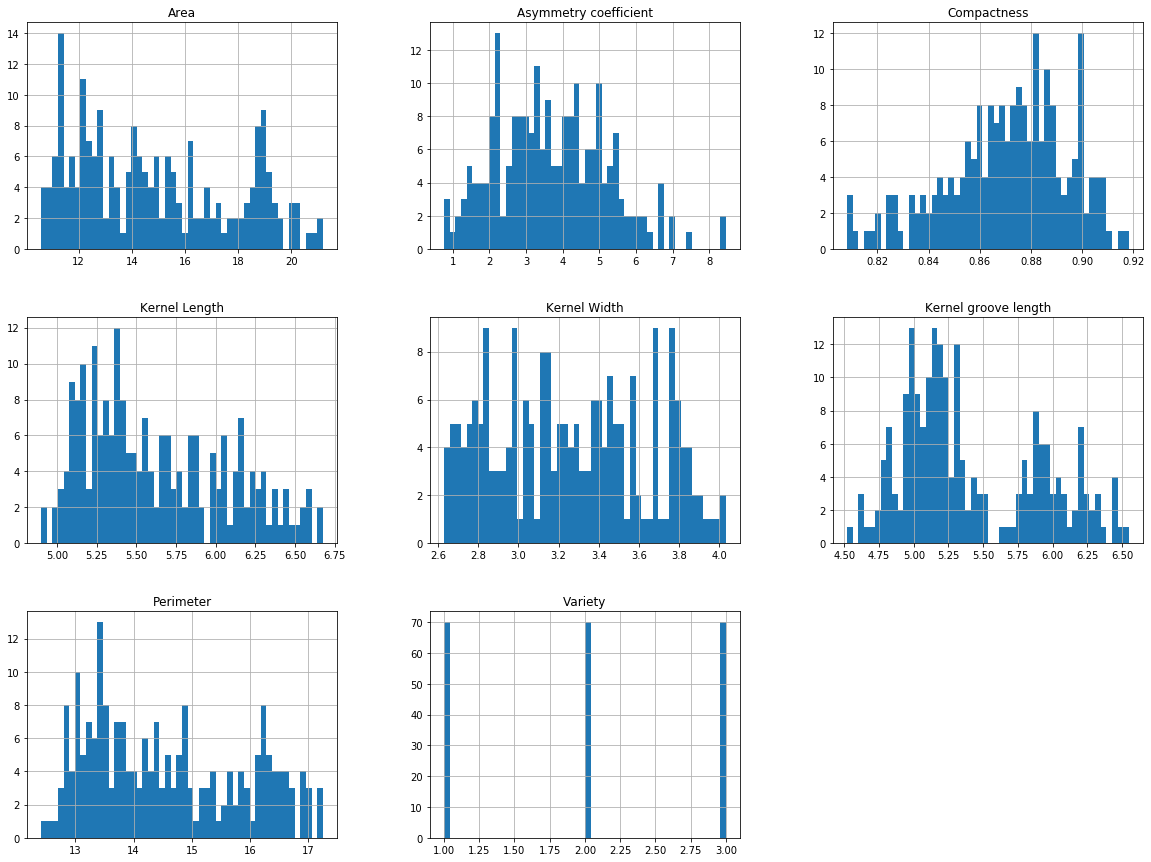

In [10]:
# ===========================================================================
#                              [Exploratory Analysis]
# ===========================================================================
print('Plot of Histogram showing the distribution of each feature')
df.hist(bins=50, figsize=(20,15))
plt.show()

Visual representation of the correlation matrix ------Heatmap------


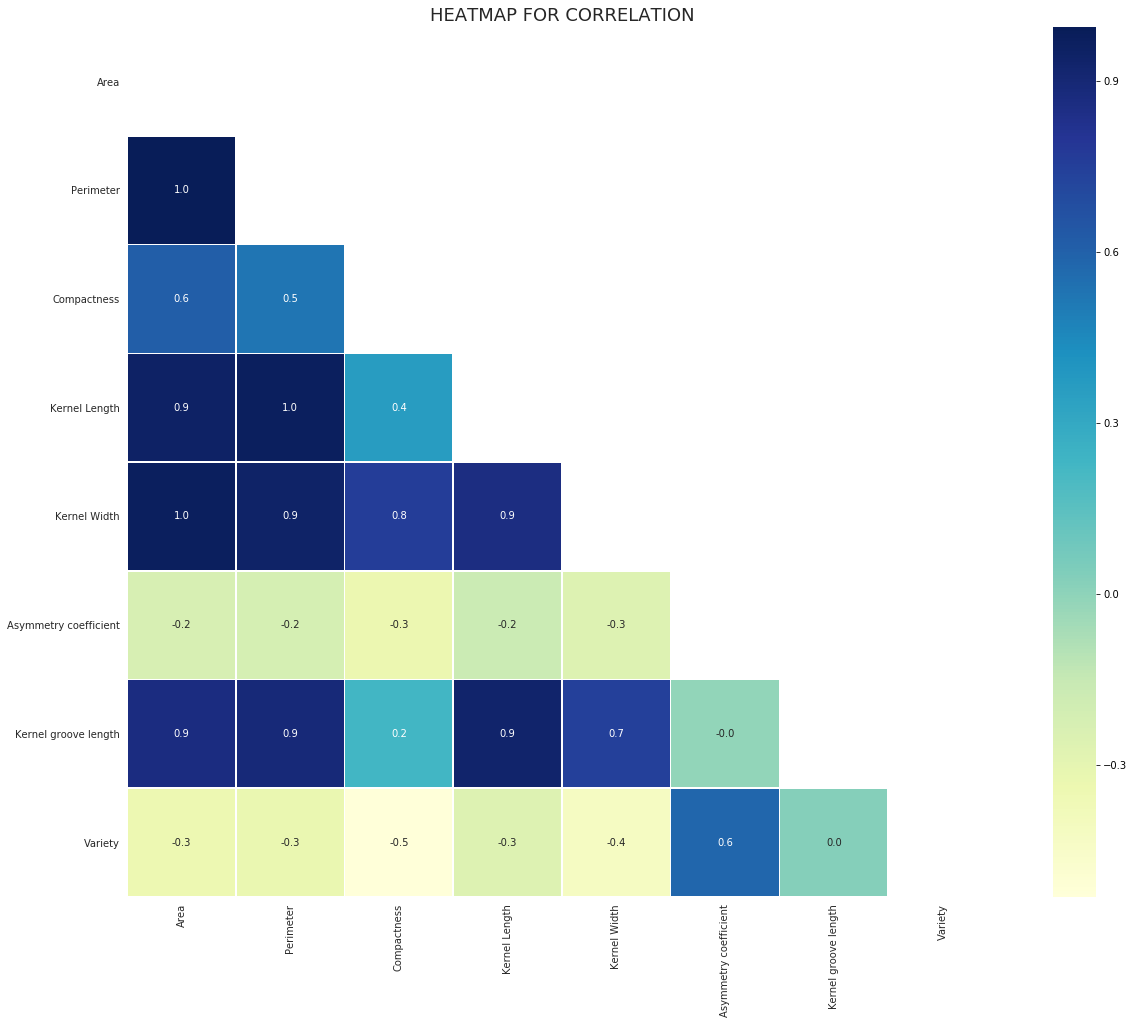

In [11]:
#Build the correlation table
corr = df.corr()
print('Visual representation of the correlation matrix ------Heatmap------')
corr = corr [corr < 1] ## To avoid getting correlation of variable with themselves i.e value of 1 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="YlGnBu", linewidths=.5, mask = mask, ax=ax)
plt.title('HEATMAP FOR CORRELATION', size=18);


In [12]:
# ===========================================================================
#                              [Predictive Analysis]
# ===========================================================================
# Seperate the y from the x columns
X = df.drop('Variety',axis=1)
Y = df['Variety']

# for roc curve
Y =  = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1] 

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


In [13]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))

Original dataset shape Counter({1: 70, 2: 70, 3: 70})


Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.884):
{'m__criterion': 'gini', 'm__max_depth': None, 'm__max_leaf_nodes': None, 'm__min_samples_leaf': 1, 'm__min_samples_split': 2, 'pca__n_components': 5}


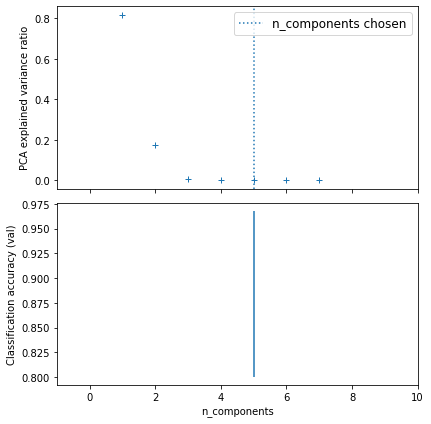

In [14]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model1 = DecisionTreeClassifier(random_state=0)
#resample = SVMSMOTE(random_state = 42)
pipe_dt = Pipeline([('s', scaler), ('pca', pca),('m', model1)])

#pipe_dt.fit(X_train, Y_train)

# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components":[5, 10, 15, 20, 30],
              "m__criterion": ["gini", "entropy"],
              "m__min_samples_split": [2, 10, 20],
              "m__max_depth": [None, 2, 5, 10],
              "m__min_samples_leaf": [1, 5, 10],
              "m__max_leaf_nodes": [None, 5, 10, 20],
              }

search = GridSearchCV(pipe_dt, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_dt = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 10)

plt.tight_layout()
plt.show()


In [15]:
#----------Test Best Parameters---------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time

t0 = time()
clf_dt =clf_dt.best_estimator_
y_pred_dt = clf_dt.predict(X_validation)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_dt = cross_val_score(clf_dt, X_train, y_train, cv=cv)



done in 0.003s


In [16]:
#---------Classification report--------
print ("----------------------> [DecisionTreeClassifier performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_dt, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_dt.mean(),
                                          scores_cv_dt.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_dt))
print(classification_report(y_validation,y_pred_dt))
print('Misclassified examples: %d' % (y_validation != y_pred_dt).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_dt).sum()/y_pred_dt.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_dt.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_dt.score(X_train, y_train)))
print('--------------- DecisionTreeClassifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [DecisionTreeClassifier performance summary]
Accuracy: 0.937
mean: 0.864 (std: 0.074)

[[22  0  2]
 [ 2 16  0]
 [ 0  0 21]]
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        24
           2       1.00      0.89      0.94        18
           3       0.91      1.00      0.95        21

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

Misclassified examples: 4
Misclassification/Error rate: 0.032 %
Test set Accuracy: 0.937
Training set Accuracy: 1.000
--------------- DecisionTreeClassifier --Parameters specified-- : classifier.fit [Done]


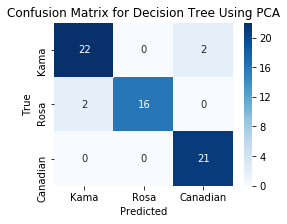

In [17]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_dt)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Kama', 'Rosa', 'Canadian'], 
            yticklabels = ['Kama', 'Rosa','Canadian'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Decision Tree Using PCA");


Prediction accuracy for the standardized test dataset with PCA --DT
87.30%


PC 1 with:
 [ 0.44696773  0.44423254  0.25578801  0.42830414  0.43526808 -0.09229136
  0.39500552]

PC 2 with:
 [ 0.01958073  0.07512021 -0.56101306  0.18598592 -0.11483869  0.71419767
  0.34839761]


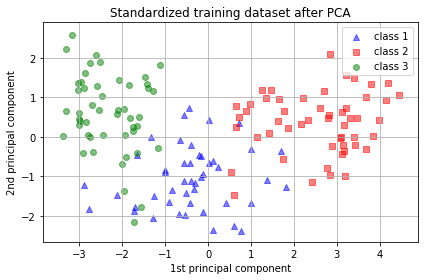

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import matplotlib.pyplot as plt


FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_dt.fit(X_train, y_train)
pred_test_std = pipe_dt.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA --DT')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_dt.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_dt.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(1, 4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.945):
{'m__n_neighbors': 1, 'pca__n_components': 5}


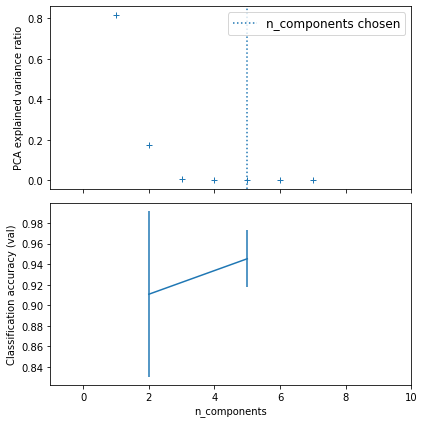

In [19]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.neighbors import KNeighborsClassifier as KNN

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model2 = KNN()

pipe_knn = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model2)])


# set parameters of pipelines using ‘__’ separated parameter names:

param_grid  = {"pca__n_components": [2,5,10,15,20,30],
              'm__n_neighbors' : range(1, 15)}

search = GridSearchCV(pipe_knn, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_knn = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 10)

plt.tight_layout()
plt.show()


In [20]:
#----------Test Best Parameters---------
t0 = time()
clf_knn =clf_knn.best_estimator_
y_pred_knn = clf_knn.predict(X_validation)
print("done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_knn = cross_val_score(clf_knn, X_train, y_train, cv=cv)




done in 0.018s


In [21]:
#---------Classification report--------
print ("----------------------> [KNearestNeighbor performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_knn, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_knn.mean(),
                                          scores_cv_knn.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_knn))
print(classification_report(y_validation,y_pred_knn))
print('Misclassified examples: %d' % (y_validation != y_pred_knn).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_knn).sum()/y_pred_knn.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_knn.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_knn.score(X_train, y_train)))
print('--------------- KNearestNeighbor --Parameters specified-- : classifier.fit [Done]')

----------------------> [KNearestNeighbor performance summary]
Accuracy: 0.905
mean: 0.930 (std: 0.064)

[[18  1  5]
 [ 0 18  0]
 [ 0  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.75      0.86        24
           2       0.95      1.00      0.97        18
           3       0.81      1.00      0.89        21

    accuracy                           0.90        63
   macro avg       0.92      0.92      0.91        63
weighted avg       0.92      0.90      0.90        63

Misclassified examples: 6
Misclassification/Error rate: 0.045 %
Test set Accuracy: 0.905
Training set Accuracy: 1.000
--------------- KNearestNeighbor --Parameters specified-- : classifier.fit [Done]


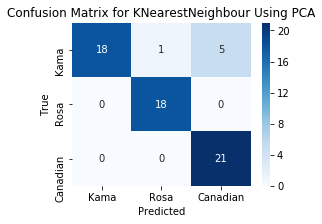

In [22]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_knn)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
             xticklabels = ['Kama', 'Rosa', 'Canadian'], 
            yticklabels = ['Kama', 'Rosa','Canadian'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for KNearestNeighbour Using PCA");


Prediction accuracy for the standardized test dataset with PCA -KNN
93.65%


PC 1 with:
 [ 0.44696773  0.44423254  0.25578801  0.42830414  0.43526808 -0.09229136
  0.39500552]

PC 2 with:
 [ 0.01958073  0.07512021 -0.56101306  0.18598592 -0.11483869  0.71419767
  0.34839761]


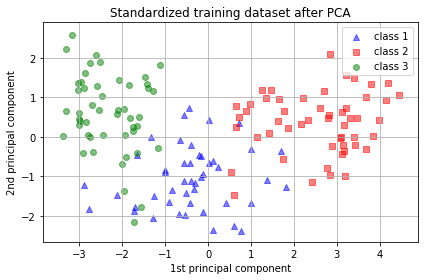

In [23]:
FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_knn.fit(X_train, y_train)
pred_test_std = pipe_knn.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA -KNN')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_knn.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_knn.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(1, 4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter NB (CV score=0.938):
{'pca__n_components': 5}


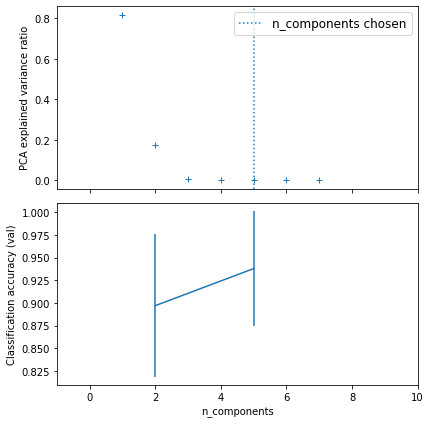

In [24]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.naive_bayes import GaussianNB


#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model3 = GaussianNB()

pipe_NB = Pipeline(steps=[('s', scaler), ('pca', pca), ('m', model3)])


# set parameters of pipelines using ‘__’ separated parameter names:

param_grid = {"pca__n_components": [2,5,10,15,20,30],
              }


search = GridSearchCV(pipe_NB, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_NB = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter NB (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_train)

#plot
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.xlim(-1, 10)

plt.tight_layout()
plt.show()


In [25]:
#----------Test Best Parameters---------
t0 = time()
clf_NB =clf_NB.best_estimator_
y_pred_NB = clf_NB.predict(X_validation)
print("Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_NB = cross_val_score(clf_NB, X_train, y_train, cv=cv)


Done in 0.005s


In [26]:
#---------Classification report--------
print ("----------------------> [Naive Bayes Classifier performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_NB, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_NB.mean(),
                                          scores_cv_NB.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_NB))
print(classification_report(y_validation,y_pred_NB))
print('Misclassified examples: %d' % (y_validation != y_pred_NB).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_NB).sum()/y_pred_NB.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_NB.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_NB.score(X_train, y_train)))
print('--------------- Naive Bayes Classifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [Naive Bayes Classifier performance summary]
Accuracy: 0.937
mean: 0.934 (std: 0.057)

[[20  0  4]
 [ 0 18  0]
 [ 0  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        24
           2       1.00      1.00      1.00        18
           3       0.84      1.00      0.91        21

    accuracy                           0.94        63
   macro avg       0.95      0.94      0.94        63
weighted avg       0.95      0.94      0.94        63

Misclassified examples: 4
Misclassification/Error rate: 0.031 %
Test set Accuracy: 0.937
Training set Accuracy: 0.939
--------------- Naive Bayes Classifier --Parameters specified-- : classifier.fit [Done]


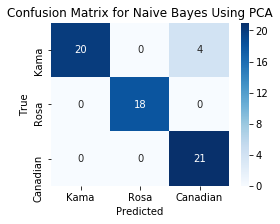

In [27]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_NB)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
             xticklabels = ['Kama', 'Rosa', 'Canadian'], 
            yticklabels = ['Kama', 'Rosa','Canadian'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Naive Bayes Using PCA");


Prediction accuracy for the standardized test dataset with PCA -NB
95.24%


PC 1 with:
 [ 0.44696773  0.44423254  0.25578801  0.42830414  0.43526808 -0.09229136
  0.39500552]

PC 2 with:
 [ 0.01958073  0.07512021 -0.56101306  0.18598592 -0.11483869  0.71419767
  0.34839761]


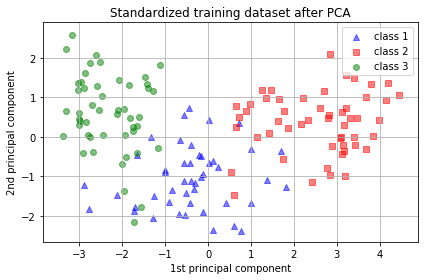

In [28]:
FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_NB.fit(X_train, y_train)
pred_test_std = pipe_NB.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA -NB')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_NB.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_NB.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(1, 4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

In [29]:
print('Applying dimensionality Reduction using Principal Component Analysis [PCA]')
from sklearn.svm import SVC
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import Pipeline

#Define Pipeline
pca = PCA()
#Define normalization using standard scaler
scaler = StandardScaler()
#Define model
model4 = SVC(class_weight = 'balanced', probability=True)
#resample 
resample = SVMSMOTE(random_state=0)
pipe_svc = Pipeline(steps=[('s', scaler), ('pca', pca), ('r', resample), ('m', model4)])


# set parameters of pipelines using ‘__’ separated parameter names:
param_grid = [{'m__kernel': ['rbf'], 'm__gamma': [1e-3, 1e-4],
              'm__C': [1, 10,100,1000]},
              {'m__kernel': ['linear'], 'm__C': [1, 10,100,1000]}]

search = GridSearchCV(pipe_svc, param_grid, n_jobs=-1)

#fit the Gridsearch
clf_svc = search.fit(X_train, y_train)
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


Applying dimensionality Reduction using Principal Component Analysis [PCA]
Best parameter (CV score=0.945):
{'m__C': 100, 'm__kernel': 'linear'}


In [30]:
#----------Test Best Parameters---------
t0 = time()
clf_svc =clf_svc.best_estimator_
y_pred_svc = clf_svc.predict(X_validation)
print("Done in %0.3fs" % (time() - t0))
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_cv_svc = cross_val_score(clf_svc, X_train, y_train, cv=cv)



Done in 0.007s


In [31]:
#---------Classification report--------
print ("----------------------> [Support Vector performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred_svc, y_validation)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv_svc.mean(),
                                          scores_cv_svc.std()),
                                          end="\n\n" )
print(confusion_matrix(y_validation,y_pred_svc))
print(classification_report(y_validation,y_pred_svc))
print('Misclassified examples: %d' % (y_validation != y_pred_svc).sum())
print('Misclassification/Error rate: %.3f' % ((y_validation != y_pred_svc).sum()/y_pred_svc.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf_svc.score(X_validation, y_validation)))
print("Training set Accuracy: {:.3f}".format(clf_svc.score(X_train, y_train)))
print('--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [Support Vector performance summary]
Accuracy: 0.952
mean: 0.941 (std: 0.049)

[[21  0  3]
 [ 0 18  0]
 [ 0  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.88      0.93        24
           2       1.00      1.00      1.00        18
           3       0.88      1.00      0.93        21

    accuracy                           0.95        63
   macro avg       0.96      0.96      0.96        63
weighted avg       0.96      0.95      0.95        63

Misclassified examples: 3
Misclassification/Error rate: 0.023 %
Test set Accuracy: 0.952
Training set Accuracy: 0.980
--------------- Support Vector Classifier --Parameters specified-- : classifier.fit [Done]


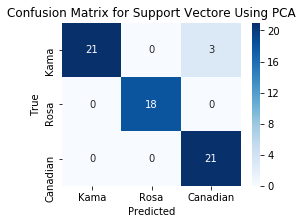

In [32]:
#plot of confusion matrix
plt.figure(figsize=(4,3))
cm =confusion_matrix(y_validation, y_pred_svc)
sns.heatmap(cm,annot=True, cmap="Blues", fmt="d", 
              xticklabels = ['Kama', 'Rosa', 'Canadian'], 
            yticklabels = ['Kama', 'Rosa','Canadian'])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for Support Vectore Using PCA");


Prediction accuracy for the standardized test dataset with PCA -SVC
93.65%


PC 1 with:
 [ 0.44696773  0.44423254  0.25578801  0.42830414  0.43526808 -0.09229136
  0.39500552]

PC 2 with:
 [ 0.01958073  0.07512021 -0.56101306  0.18598592 -0.11483869  0.71419767
  0.34839761]


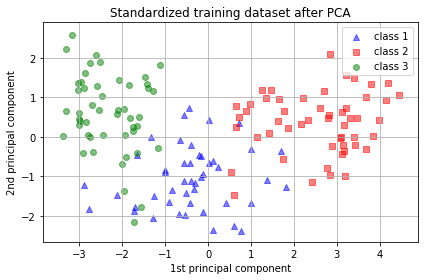

In [33]:
FIG_SIZE = (10, 7)
# Fit to data and predict using pipelined scaling, GNB and PCA.
pipe_svc.fit(X_train, y_train)
pred_test_std = pipe_svc.predict(X_validation)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the standardized test dataset with PCA -SVC')
print('{:.2%}\n'.format(metrics.accuracy_score(y_validation, pred_test_std)))

# Extract PCA from pipeline
pca_std = pipe_svc.named_steps['pca']

# Show first principal components
print('\nPC 1 with:\n', pca_std.components_[0])
print('\nPC 2 with:\n', pca_std.components_[1])
# Use PCA without and with scale on X_train data for visualization.
scaler = pipe_svc.named_steps['s']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, ax = plt.subplots()

for l, c, m in zip(range(1, 4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax.set_title('Standardized training dataset after PCA')
ax.set_xlabel('1st principal component')
ax.set_ylabel('2nd principal component')
ax.legend(loc='upper right')
ax.grid()

plt.tight_layout()

plt.show()

--------------- DecisionTreeClassifier --Learning Curve-- : [Done]


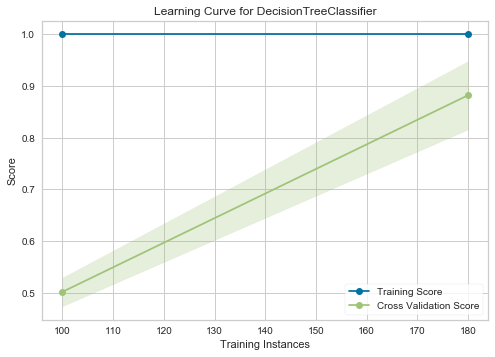

In [34]:
print('--------------- DecisionTreeClassifier --Learning Curve-- : [Done]')
from yellowbrick.model_selection import LearningCurve
sizes = [1, 100, 180]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_dt, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y )        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

--------------- KNeighboursClassifier --Learning Curve-- : [Done]


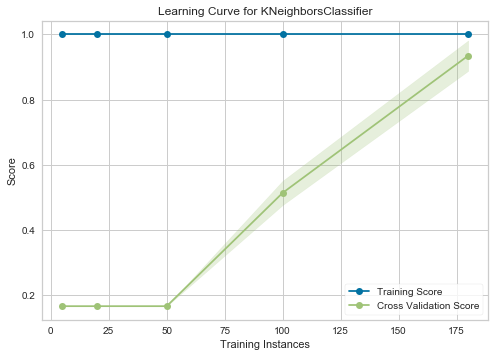

In [35]:
print('--------------- KNeighboursClassifier --Learning Curve-- : [Done]')
from yellowbrick.model_selection import LearningCurve
sizes = [1,5, 20, 50, 100, 180]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_knn, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y )        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

--------------- Naive Bayes Classifier --Learning Curve-- : [Done]


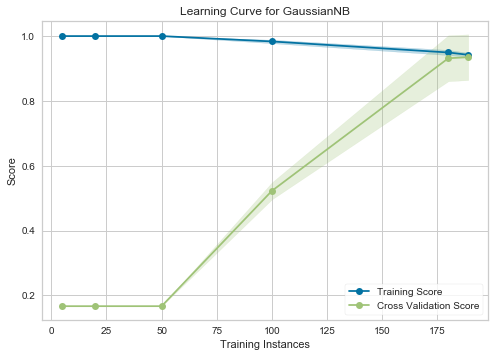

In [36]:
print('--------------- Naive Bayes Classifier --Learning Curve-- : [Done]')
from yellowbrick.model_selection import LearningCurve
sizes = [1,5, 20, 50, 100, 180, 189]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_NB, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y )        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

--------------- Support Vector Classifier --Learning Curve-- : [Done]


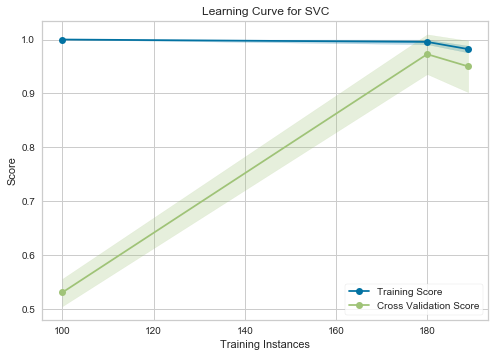

In [37]:
print('--------------- Support Vector Classifier --Learning Curve-- : [Done]')
from yellowbrick.model_selection import LearningCurve
sizes = [1,5, 20, 50, 100, 180, 189]
# Instantiate the classification model and visualizer

visualizer = LearningCurve(
    clf_svc, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y )        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [38]:
# ===========================================================================
#                              [k-means]
# ===========================================================================

# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

#scale the dataset using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# keep the first ten principal components of the data
pca = PCA(n_components=5, random_state=0)
# fit PCA model to breast cancer data
pca.fit(X)
# transform data onto the first ten principal components
X_pca = pca.transform(X)

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state = 0)
y_kmeans = kmeans.fit_predict(X_pca)
print("Cluster memberships:\n{}".format(y_kmeans))
print("Cluster sizes k-means: {}".format(np.bincount(y_kmeans)))

# Get the cluster centroids
print("Cluster Centers:\n{}".format(kmeans.cluster_centers_))


Cluster memberships:
[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1]
Cluster sizes k-means: [71 72 67]
Cluster Centers:
[[-0.27001907  1.00475058  0.02016322  0.11515752 -0.05100406]
 [-2.34417954 -0.60284699 -0.01305051 -0.06226972  0.02270928]
 [ 2.80525792 -0.41690012 -0.00734257 -0.05511588  0.02964508]]


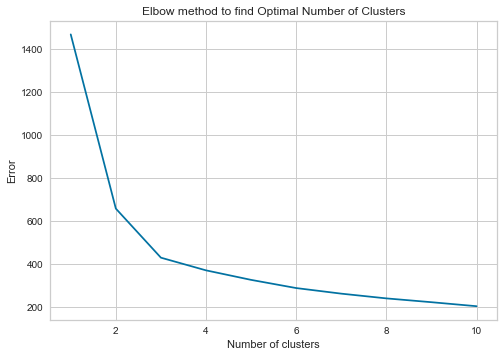

In [39]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method to find Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.show()

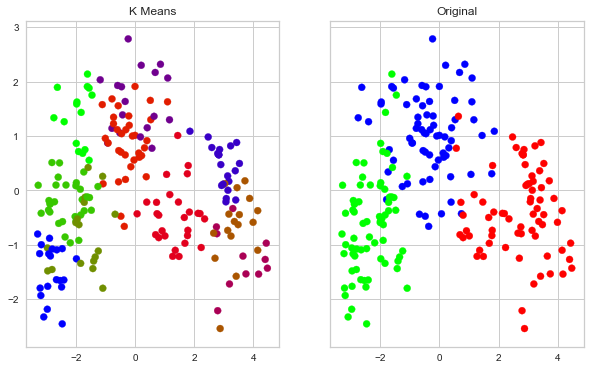

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax2.set_title("Original")
ax2.scatter(X_pca[:,0],X_pca[:,1],c=Y,cmap='brg')
ax1.set_title('K Means')
ax1.scatter(X_pca[:,0],X_pca[:,1],c=kmeans.labels_,cmap='brg')
